In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('it_sp_orders_q1_full_last_version.dsv', sep=';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895194 entries, 0 to 895193
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              895194 non-null int64
SCM_N_ORDER_NR                  895194 non-null int64
TDT_T_KEY_ORDER_DATE            895194 non-null object
THR_C_KEY_ORDER_HOUR            895194 non-null object
SIT_N_KEY_SITE                  895194 non-null int64
CUS_N_KEY_CUSTOMER              895194 non-null int64
SCM_SALES_BMF                   895194 non-null object
SCM_SALES_CANCEL_BMF            895194 non-null object
SCM_D_FINANCE_CM1               895194 non-null object
SCM_D_FINANCE_CM2               895194 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    895194 non-null object
SCM_AP_ID                       895194 non-null int64
SCM_AS_ID                       895194 non-null int64
SCM_MASTER_AP_ID                895194 non-null int64
SCM_IS_ZSP_ORDER                895194 non-null int64
SCM_C_ORDER_STATUS              895194 non-null object
CTP_N_KEY_CUSTOME

In [5]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP
0,433290484,101560438,01/01/18,12:39,12,1649336,"3,49",0,"0,7107","-0,1619",...,01/01/18,54,5,"9,9",101560438,1649336,1649336,753596,0,NaN
1,433290483,101560438,01/01/18,12:39,12,1649336,"9,99",0,"8,1885","8,1885",...,01/01/18,54,5,"9,9",101560438,1649336,1649336,903719,0,NaN
2,433290485,101560438,01/01/18,12:39,12,1649336,"4,99",0,"1,0902","-0,1924",...,01/01/18,54,5,"9,9",101560438,1649336,1649336,1976675,0,NaN
3,433290488,101560438,01/01/18,12:39,12,1649336,"-1,85",0,"-1,5164","-1,5164",...,01/01/18,54,5,"9,9",101560438,1649336,1649336,6,0,NaN
4,433290486,101560438,01/01/18,12:39,12,1649336,"9,98",0,"2,1403","-0,1769",...,01/01/18,54,5,"9,9",101560438,1649336,1649336,2220610,0,NaN


In [6]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [7]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [8]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [9]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [10]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [13]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [14]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [15]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [16]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [17]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [18]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [19]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(895194, 159590)

In [20]:
#CHECK DUPLICATED ROWS

In [21]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [22]:
len(dupl_mask), sum(dupl_mask)

(159590, 776)

In [23]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [24]:
dup_orders[:10]

array([101570566, 101574420, 101640907, 101944786, 102062259, 102241348,
       102278140, 102454370, 102595160, 102600046], dtype=int64)

In [25]:
len(dup_orders)

776

In [26]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

10572

In [27]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [28]:
cust_2_dup_orders

array([], dtype=int64)

In [29]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([], dtype=int64)

In [30]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [31]:
len(dup_indexes)

776

In [32]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [33]:
len(dup_indexes)

776

In [34]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [35]:
len(dupl_ind)

5286

In [36]:
exclude_data = data.index.isin(dupl_ind)

In [37]:
data = data[~exclude_data]

In [38]:
len(data)

889908

In [39]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [40]:
ztq = [51, 52, 53, 54, 55, 56]

## Gathering metrics

In [41]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [42]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,23750,48729,3762952.05,3138705.12,904993.59,398847.81,28.83,12.71,-115640.99,0.44,-1971.20,10.86,-15821.17
1,52,15257,31741,2766360.65,2304941.62,645610.66,288111.62,28.01,12.50,-85592.62,0.62,-2636.36,12.02,-13492.71
2,53,11526,23757,1908970.64,1592540.90,454169.71,199749.88,28.52,12.54,-99752.75,0.49,-846.54,13.63,-9197.50
3,54,11381,24823,2269226.66,1890239.70,503506.86,211993.22,26.64,11.22,-119757.54,0.99,-2990.75,16.25,-15872.29
4,55,1569,2622,170462.88,140753.77,40443.96,15865.87,28.73,11.27,-5202.50,0.46,-146.69,14.34,-1049.05
5,56,14861,27904,2109013.16,1744436.30,458014.21,172316.96,26.26,9.88,-109262.38,0.63,-1568.15,18.65,-15728.39


In [43]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [44]:
metrics_ztq.round(2).style.apply(highlight_max)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,23750,48729,3.76295e+06,3.13871e+06,904994,398848,28.83,12.71,-115641,0.44,-1971.2,10.86,-15821.2
1,52,15257,31741,2.76636e+06,2.30494e+06,645611,288112,28.01,12.5,-85592.6,0.62,-2636.36,12.02,-13492.7
2,53,11526,23757,1.90897e+06,1.59254e+06,454170,199750,28.52,12.54,-99752.8,0.49,-846.54,13.63,-9197.5
3,54,11381,24823,2.26923e+06,1.89024e+06,503507,211993,26.64,11.22,-119758,0.99,-2990.75,16.25,-15872.3
4,55,1569,2622,170463,140754,40444,15865.9,28.73,11.27,-5202.5,0.46,-146.69,14.34,-1049.05
5,56,14861,27904,2.10901e+06,1.74444e+06,458014,172317,26.26,9.88,-109262,0.63,-1568.15,18.65,-15728.4


- Low CM2% in Tier 56 and slightly high percentage of negative CM2 orders.

## Behaviour per Tier

Histograms show frequencies from data values in a sample. We will see those for order number (order_ko_count_net, meaning the nth order the customer has placed) and other one based on basket value.

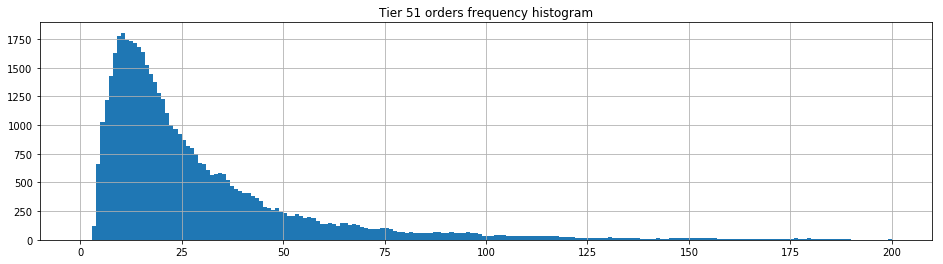

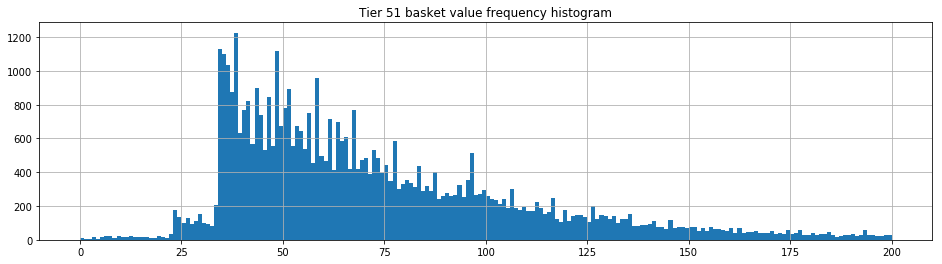

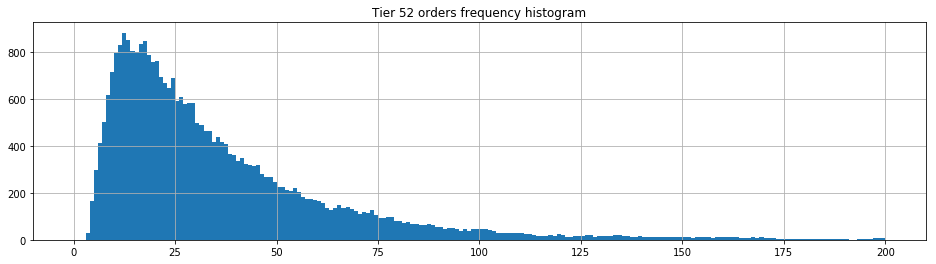

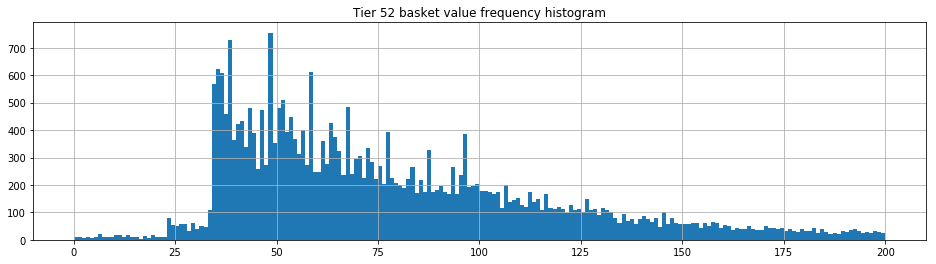

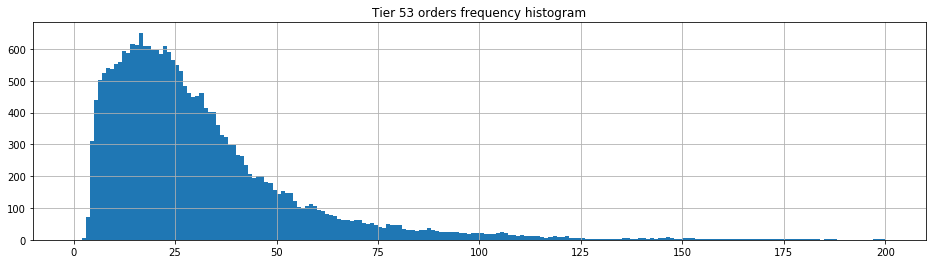

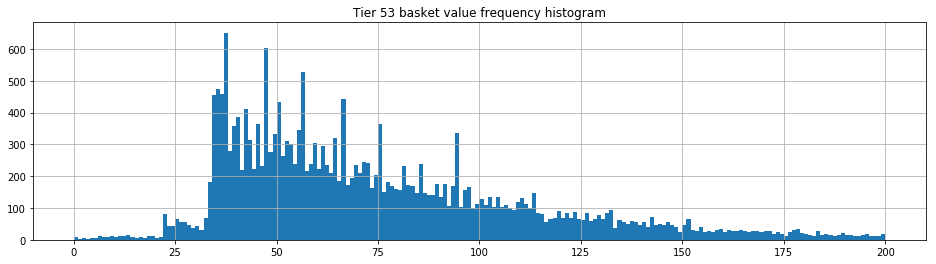

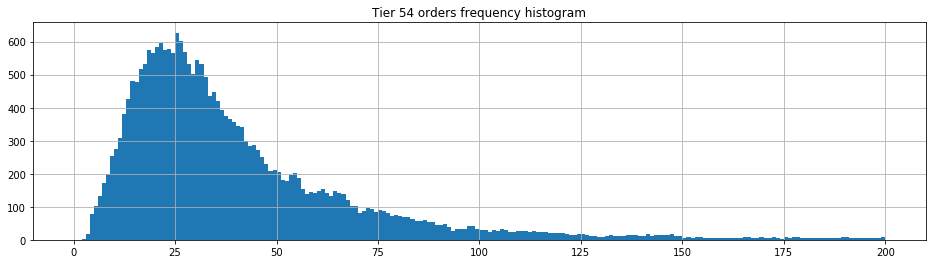

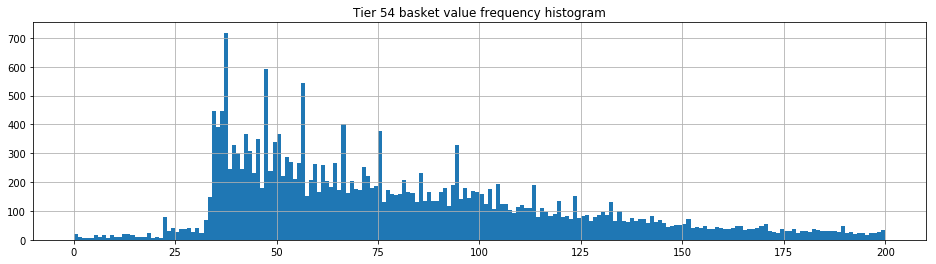

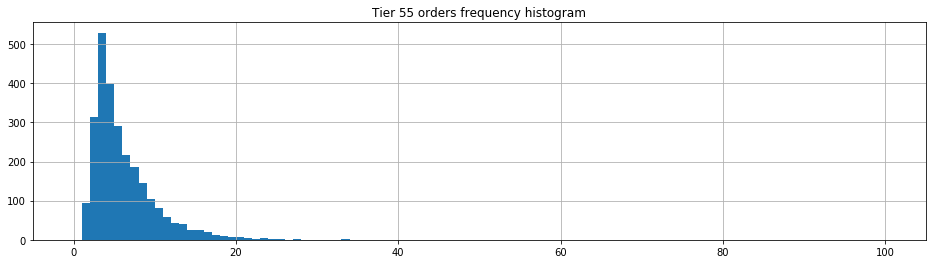

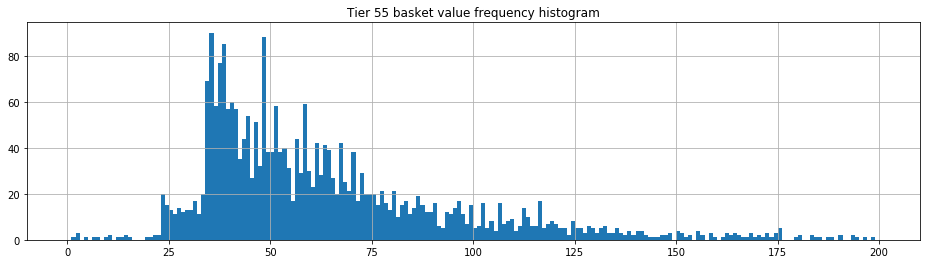

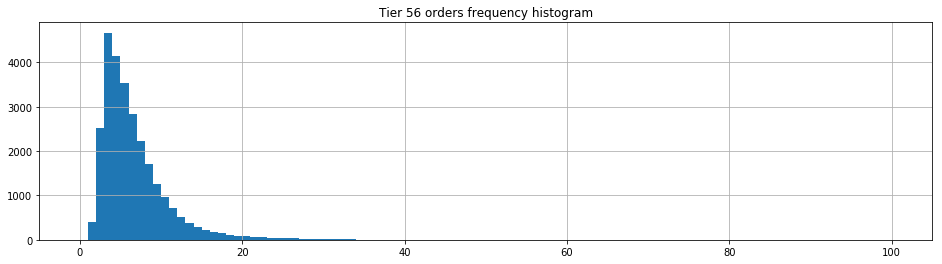

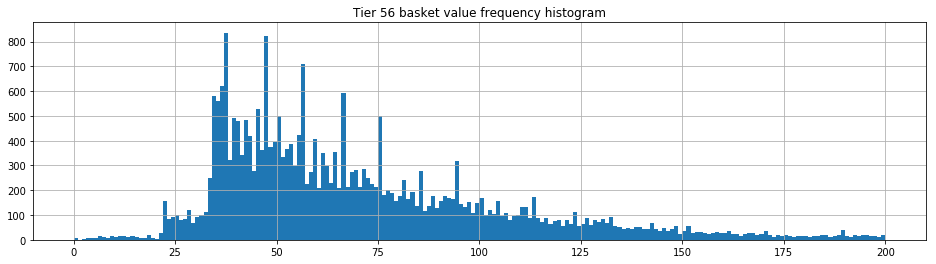

In [45]:
orders_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
basket_value_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    if tq in [51, 52, 53, 54]:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)
        
    else:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=100, range=(0, 100))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)

And gather them into two tables...

In [46]:
#ORDERS HISTOGRAM SUMMARY
orders_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,48729,29.66,30.3,3,12,20,36,321
1,52,31741,36.99,35.63,3,16,27,46,542
2,53,23757,31.48,30.75,2,15,25,39,484
3,54,24823,51.52,114.98,2,21,32,51,2616
4,55,2622,5.59,3.83,1,3,4,7,33
5,56,27904,53.28,394.2,1,3,5,8,4376


In [47]:
#BASKET VALUE HISTOGRAM SUMMARY
basket_value_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,48729,77.22,47.8,-5.34,46.39,64.01,95.02,1156.72
1,52,31741,87.15,59.49,-7.03,48.49,70.78,106.66,1259.89
2,53,23757,80.35,50.12,-3.15,47.48,66.49,97.98,818.62
3,54,24823,91.42,69.15,-74.48,48.6,73.95,112.53,3019.01
4,55,2622,65.01,34.73,-2.66,40.72,55.19,77.59,337.41
5,56,27904,75.58,50.85,-6.76,44.8,61.91,92.08,2549.39


**Existing customers:**

- Resellers activity in Tier 54.
- Tier 53 performing between tiers 51 and 52 in terms of orders, but basket value closer to Tier 51 (analysis going through criteria for renewals).

**New customers:**

- Strong resellers activity in Tier 56
- Average basket value for Tier 55 specially low compared with other tiers.

### Locate and quantify unprofitable  CM1 orders in absolute and relative terms regarding PG3 and PG4 levels per Tier

In [48]:
ord_cm1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [49]:
ord_neg_cm1 = ord_cm1[ord_cm1 <= 0].index.values

In [50]:
data['IS_CM1_NEG_ORDER'] = data['SCM_N_ORDER_NR'].isin(ord_neg_cm1) * 1

In [51]:
ord_coupon = data[data['SCM_MASTER_AP_ID'] == 6169]['SCM_N_ORDER_NR'].unique()

In [52]:
data['ORDER_HAS_COUPON'] = data['SCM_N_ORDER_NR'].isin(ord_coupon) * 1

In [53]:
data['BP_TYP'].unique()

array([nan, 'B '], dtype=object)

In [54]:
ord_bp = data[data['BP_TYP'] == 'B ']['SCM_N_ORDER_NR'].unique()

In [55]:
ord_bp

array([101827120, 103104697, 101702203, ..., 102011550, 103922434,
       106009681], dtype=int64)

In [56]:
data['ORDER_HAS_BP'] = data['SCM_N_ORDER_NR'].isin(ord_bp) * 1

In [57]:
data['ORDER_HAS_C+BP'] = data['ORDER_HAS_COUPON'] * data['ORDER_HAS_BP']

In [58]:
import cx_Oracle

In [59]:
data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique()

array([  2068,    252,    251,    409,      9,    301,     18,   2192,
          221,    857,   1540,     33,     23,     36,   2190,   1400,
           65,    305,     34,  40023,     29, 207553,     45,    741,
       153317,    758,     20, 207624,     38,     15,    484,    401,
           37,  49828,   9788,     67,     68,   2155,     42,     16,
          274,  17947,     47,     62,   2471,     50,   3119,   1635,
       126729, 255413,  49821,     51,   1106,    486,     48,   1603,
         9885,    470,  15781, 122375], dtype=int64)

In [60]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [61]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [62]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [63]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [64]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [65]:
pg3_dict[0] = 'null'

In [66]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [67]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(889908, 889908)

In [68]:
data['LEAD_PG3_NAME'] = lista_pg3

In [69]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [70]:
0 in pg4_l

False

In [71]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [72]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [73]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [74]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [75]:
pg4_dict[-1] = 'null'

In [76]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [77]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(889908, 889908)

In [78]:
data['LEAD_PG4_NAME'] = lista_pg4

In [79]:
from IPython.display import display

+ OSP_3_LEAD_P_PG_ID
+ LEAD_PG3_NAME
+ OSP_4_LEAD_P_PG_ID
+ LEAD_PG4_NAME
+ IS_CM1_NEG_ORDER: flag 0-1, grouping all negative or positive orders regarding to CM1
+ SCM_N_ORDER_NR: orders amount for the corresponding flag
+ ORDERS_IN_PG: orders in product group (orders in flag 0, positives, plus orders in flag 1, negatives)
+ PERC_%_IN_PG: SCM_N_ORDER_NR / ORDERS_IN_PG
+ ORDER_HAS_COUPON: total orders using coupons
+ COUPONS_IN_PG: total coupons used in product group
+ COUPONS_%_IN_PG: ORDER_HAS_COUPON / COUPONS_IN_PG
+ ORDER_HAS_BP: total orders using coupons
+ BP_IN_PG: total orders having bonuspoints as payment in product group
+ BP_%_IN_PG: ORDER_HAS_BP / BP_IN_PG
+ SCM_D_FINANCE_CM1: CM1 sum from the orders in the flag
+ PERC_%_TOTAL_LOSS: CM1 sum divided by the total loss CM1 (sum CM1 for all negative CM1 orders)

In [80]:
orders_CM1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
orders_CM1_neg = orders_CM1[orders_CM1 <= 0].index.values
print('Total orders: ', len(orders_CM1))
print('Total orders with negative CM1: ', len(orders_CM1_neg))
print('% of negative CM1 orders: ', len(orders_CM1_neg) / len(orders_CM1) * 100)
print('Total loss of CM1 (sum CM1 for all negative CM1 orders): ', orders_CM1[orders_CM1 <= 0].sum())
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG3 [Top 20]')
grp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                            as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_COUPON'].mean()
grp_bp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_BP'].mean()
grp_cbp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_C+BP'].mean()
df1 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc = grp_c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp = grp_bp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfbpc = grp_cbp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df3 = pd.merge(df1, df2, left_index=True, right_index=True, copy=False)
dfcbp = pd.merge(dfc, dfbp, left_index=True, right_index=True, copy=False)
df3cbp = pd.merge(df3, dfcbp, left_index=True, right_index=True, copy=False)
df_c_bp = pd.merge(df3cbp, dfbpc, left_index=True, right_index=True, copy=False)
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x', 'SCM_N_ORDER_NR',
                 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df_c_bp.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR', 
                    'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']
df_c_bp['ORDERS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['SCM_N_ORDER_NR'].transform('sum')
df_c_bp['PERC_%_IN_PG'] = df_c_bp['SCM_N_ORDER_NR'] / df_c_bp['ORDERS_IN_PG'] * 100
df_c_bp['COUPONS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_COUPON'].transform('sum')
#df3cbp['COUPONS_%_IN_PG'] = df3cbp['ORDER_HAS_COUPON'] / df3cbp['COUPONS_IN_PG'] * 100
df_c_bp['BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_BP'].transform('sum')
#df3cbp['BP_%_IN_PG'] = df3cbp['ORDER_HAS_BP'] / df3cbp['BP_IN_PG'] * 100
df_c_bp['C+BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_C+BP'].transform('sum')
df_c_bp['PERC_%_TOTAL_LOSS'] = df_c_bp['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR','ORDERS_IN_PG', 'PERC_%_IN_PG',
              'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG',
              'ORDER_HAS_C+BP', 'C+BP_IN_PG', 'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df_c_bp.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG4 [Top 20]')
grp_2 = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_2c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].mean()
grp_2b = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].mean()
grp_2cb = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].mean()
df1_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc_2 = grp_2c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp_2 = grp_2b.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfcbp_2 = grp_2cb.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df4 = pd.merge(df1_2, df2_2, left_index=True, right_index=True, copy=False)
dfc_2 = pd.merge(dfc_2, dfbp_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4, dfc_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4c, dfcbp_2, left_index=True, right_index=True, copy=False)
df4c = df4c[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'OSP_4_LEAD_P_PG_ID_x_x', 'LEAD_PG4_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x',
                 'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df4c.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER',
                    'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP','SCM_D_FINANCE_CM1']
df4c['ORDERS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['SCM_N_ORDER_NR'].transform('sum')
df4c['PERC_%_IN_PG'] = df4c['SCM_N_ORDER_NR'] / df4c['ORDERS_IN_PG'] * 100
df4c['COUPONS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_COUPON'].transform('sum')
#df4c['COUPONS_%_IN_PG'] = df4c['ORDER_HAS_COUPON'] / df4c['COUPONS_IN_PG'] * 100
df4c['BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_BP'].transform('sum')
#df4c['BP_%_IN_PG'] = df4c['ORDER_HAS_BP'] / df4c['BP_IN_PG'] * 100
df4c['C+BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_C+BP'].transform('sum')
df4c['PERC_%_TOTAL_LOSS'] = df4c['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df4c = df4c[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR',
                 'ORDERS_IN_PG', 'PERC_%_IN_PG', 'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG', 
             'ORDER_HAS_C+BP', 'C+BP_IN_PG',
             'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df4c.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('........................................................................................')
print('')

Total orders:  159590
Total orders with negative CM1:  958
% of negative CM1 orders:  0.6002882386114419
Total loss of CM1 (sum CM1 for all negative CM1 orders):  -10159.695500000002
........................................................................................

Unprofitable CM1 orders per Lead PG3 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
37,251,hundefutter_trockenfutter,1,235,56057,0.42,158,7234,75,8075,31,1436,-2593.95,25.53
63,2068,katzenfutter_dose,1,190,33637,0.56,137,5701,81,6122,40,1335,-2367.52,23.30
39,252,katzenfutter_trockenfutter,1,210,27543,0.76,140,4297,64,4640,25,889,-2310.88,22.75
54,857,hundefutter_nassfutter,1,63,10465,0.60,48,1365,22,1724,14,308,-892.32,8.78
42,301,katzenstreu,1,56,7073,0.79,47,981,11,1123,8,193,-641.89,6.32
7,18,hundesnacks,1,50,5616,0.89,20,803,22,1033,5,170,-356.59,3.51
86,207553,ungezieferschutz,1,25,2869,0.87,22,420,12,532,9,111,-282.10,2.78
1,9,hundebett,1,10,1724,0.58,8,415,2,224,2,64,-91.78,0.90
13,29,katzentoilette,1,12,1500,0.80,8,354,4,213,2,53,-91.26,0.90
88,207624,ungezieferschutz,1,6,526,1.14,4,88,2,101,0,22,-65.94,0.65


........................................................................................

Unprofitable CM1 orders per Lead PG4 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
1897,2068,katzenfutter_dose,2071,felix,1,42,3080,1.36,30,440,20,572,9,102,-720.80,7.09
1100,252,katzenfutter_trockenfutter,683,royal_canin,1,63,6187,1.02,31,916,21,970,3,200,-508.79,5.01
1350,301,katzenstreu,304,cats_best,1,25,1365,1.83,23,185,5,200,4,36,-366.89,3.61
1056,251,hundefutter_trockenfutter,243929,monge,1,17,2135,0.80,16,306,4,307,3,53,-321.63,3.17
875,251,hundefutter_trockenfutter,682,royal_canin_size,1,37,4507,0.82,19,467,10,520,0,75,-288.18,2.84
977,251,hundefutter_trockenfutter,45971,nova_foods_trainer_natural,1,18,3386,0.53,16,425,2,512,2,104,-283.39,2.79
1916,2068,katzenfutter_dose,2127,almo_nature,1,26,4359,0.60,15,614,11,697,1,123,-255.91,2.52
163,18,hundesnacks,394,zahnpflege_snacks,1,28,1147,2.44,10,169,11,214,2,36,-240.29,2.37
958,251,hundefutter_trockenfutter,18245,acana,1,18,5770,0.31,13,743,7,790,3,155,-205.47,2.02
1259,252,katzenfutter_trockenfutter,81397,royal_canin_veterinary_diet,1,13,3601,0.36,8,483,3,514,1,84,-200.67,1.98


........................................................................................
........................................................................................



## A level down through physical article level...

In [81]:
ap_list = list(data['SCM_AP_ID'].unique())

In [82]:
len(ap_list)

8088

In [83]:
ap_list.remove(0)

In [84]:
0 in ap_list

False

In [85]:
xlist = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
ylist = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

arts = pd.DataFrame()
for x, y in zip(xlist, ylist):
    my_list_str = repr(ap_list[x:y]).replace('[','(').replace(']',')') 
    conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
    curs = conn.cursor()
    #query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    #join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    #where to_char(ap_id) = :valores"""
    #art = pd.read_sql(query, con = conn, params={'valores': str(i)})
    query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    where ap_id in %s""" % my_list_str
    art = pd.read_sql(query, con = conn)
    arts = pd.concat((arts, art), axis=0, ignore_index=False)
    conn.close()    
    print(x, y)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000


In [86]:
arts['AP_NAME'] = arts['PP_NAME'] + ' ' + arts['AP_SHORT_TEXT']

### Physical Article CM1

In [87]:
freq_list = []

for n, i in enumerate(ap_list):
    ap_id = data[data['SCM_AP_ID'] == i]
    total_orders = ap_id['SCM_N_ORDER_NR'].nunique()
    total_orders_bp = ap_id[ap_id['OP_BONUSPOINTS'] != 0]['SCM_N_ORDER_NR'].nunique()
    lis_o_ap_id_neg_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] <= 0]['SCM_N_ORDER_NR'].unique()
    lis_o_ap_id_pos_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] > 0]['SCM_N_ORDER_NR'].unique()
    cnt_o_id_neg_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_neg_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_pos_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    cnt_o_id_pos_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    prod_name = arts[arts['AP_ID'] == i]['AP_NAME'].iloc[0]
    freq_list.append([i
                    , prod_name
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['mean']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['min']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['max']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['25%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['50%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['75%']
                    , total_orders
                    , total_orders_bp
                    , cnt_o_id_neg_cm1_ap_id_neg_cm1
                    , cnt_o_id_neg_cm1_ap_id_pos_cm1
                    , cnt_o_id_pos_cm1_ap_id_neg_cm1
                    , cnt_o_id_pos_cm1_ap_id_pos_cm1
                     ])
    if n % 400 == 0:
        print(n)

0
400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400
6800
7200
7600
8000


In [89]:
freq_df = pd.DataFrame(freq_list, columns=['SCM_AP_ID', 'AP_NAME', 'CM1_MEAN', 'CM1_MIN', 'CM1_MAX',
                                           'PERC_25', 'PERC_50', 'PERC_75',
                                           'TOT_ORDERS', 'TOT_ORDERS_BP', 'OCM1_NEG_APCM1_NEG', 'OCM1_NEG_APCM1_POS', 
                                           'OCM1_POS_APCM1_NEG', 'OCM1_POS_APCM1_POS'])

In [90]:
freq_df['PERC_APCM1_NEG'] = (freq_df['OCM1_NEG_APCM1_NEG'] + freq_df['OCM1_POS_APCM1_NEG']) / freq_df['TOT_ORDERS'] * 100

In [91]:
freq_df['PERC_OCM1_NEG'] = freq_df['OCM1_NEG_APCM1_NEG'] / freq_df['TOT_ORDERS'] * 100

+ SCM_AP_ID: physical article id
+ AP_NAME: physical article name
+ CM1_MEAN: average CM1
+ CM1_MIN
+ CM1_MAX
+ PERC_25: percentile 25
+ PERC_50: median 
+ PERC_75: percentile 75
+ TOT_ORDERS: orders in which physical article is present
+ TOT_ORDERS_BP: orders in which physical article has been bought using bonuspoints
+ OCM1_NEG_APCM1_NEG: orders with negative cm1 having physical article in the order negative cm1 too 
+ OCM1_NEG_APCM1_POS: orders with negative cm1 having physical article in the order positive cm1
+ OCM1_POS_APCM1_NEG: orders with positive cm1 having physical article in the order negative cm1
+ OCM1_POS_APCM1_POS: orders with positive cm1 having physical article in the order positive cm1 too
+ PERC_APCM1_NEG: (OCM1_NEG_APCM1_NEG + OCM1_POS_APCM1_NEG)/ TOT_ORDERS
+ PERC_OCM1_NEG: OCM1_NEG_APCM1_NEG / TOT_ORDERS

Let's get physical artical having more than 30 orders placed and, in more than 40% of the cases, AP_ID CM1 is negative...

In [92]:
freq_df[(freq_df['TOT_ORDERS'] > 100) & (freq_df['PERC_APCM1_NEG'] > 40)].round(2)\
.sort_values(by='PERC_APCM1_NEG', ascending=False).head(60)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
8053,29049,Rocco Chings Welcome-Paket 45g - Rocco Chings ...,-0.47,-0.47,-0.47,-0.47,-0.47,-0.47,143,0,0,0,143,0,100.00,0.00
456,20886,Extra Bonuspunkte - 200 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,1025,0,1,0,1024,0,100.00,0.10
2259,23170,Extra Bonuspunkte - 100 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,1295,0,13,0,1282,0,100.00,1.00
1773,77525,"Pet Head DIRTY TALK - Beutel, 20 ml",0.00,0.00,0.00,0.00,0.00,0.00,479,0,10,0,469,0,100.00,2.09
875,64104,Rocco Classic Nassfutter - Rocco Classic Rind ...,-0.45,-0.46,-0.45,-0.46,-0.45,-0.45,824,818,15,0,809,0,100.00,1.82
81,9795,Spende für bedürftige Tiere -,0.00,0.00,0.00,0.00,0.00,0.00,3017,3005,15,0,3002,0,100.00,0.50
997,64107,Lukullus Nassfutter - Lukullus Geflügel & Lamm...,-0.57,-0.61,1.85,-0.60,-0.60,-0.59,596,580,16,0,571,9,98.49,2.68
167,70029,"Dreamies Katzensnack, 60g - 60g + SNACKY MOUSE",-0.74,-0.76,0.02,-0.76,-0.76,-0.76,433,421,6,0,420,7,98.38,1.39
2257,78227,Latexspielzeug Ei - 9 cm,-0.66,-0.69,2.82,-0.69,-0.69,-0.69,633,0,2,0,620,11,98.26,0.32
1881,71553,Markus Mühle NaturNah Mini - 5 kg,-8.85,-9.49,8.46,-9.42,-9.29,-9.29,273,264,56,0,211,8,97.80,20.51


In [93]:
freq_df[freq_df['TOT_ORDERS'] > 30].round(2)\
.sort_values(by='PERC_OCM1_NEG', ascending=False).head(30)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
3006,25838,zooplus.de Geschenkgutschein Geschenkgutschein,7.24,0.00,45.45,0.00,0.00,4.10,66,0,48,1,0,17,72.73,72.73
5738,78638,Megapack Cesar Schale 14 x 150 g - Empfehlung ...,-7.98,-29.31,3.32,-14.66,-14.50,2.48,33,0,10,0,9,14,57.58,30.30
1881,71553,Markus Mühle NaturNah Mini - 5 kg,-8.85,-9.49,8.46,-9.42,-9.29,-9.29,273,264,56,0,211,8,97.80,20.51
3957,73554,Merial OraVet L - 7 sticks,-0.60,-15.61,14.66,-7.81,2.04,2.44,83,0,11,1,15,56,31.33,13.25
6021,69684,CFL Labrador Retriever Adult - 80 g,-0.15,-0.21,-0.07,-0.21,-0.18,-0.07,46,0,6,0,40,0,100.00,13.04
2363,48627,Funny Stripes Kuschelhäuschen - L 50 x B 50 x...,-2.86,-10.64,15.35,-10.12,-9.96,7.63,63,38,7,0,31,25,60.32,11.11
3381,73644,Merial OraVet M - 7 sticks,-1.27,-11.65,6.53,-5.82,1.06,1.31,103,0,10,1,25,67,33.98,9.71
2727,12920,Nylon Tragetasche - schwarz,-1.26,-7.34,14.85,-7.32,-7.32,4.96,64,35,6,1,29,28,54.69,9.38
1168,72383,FELIX Sensations Crunchy Crumbles 20x100 g+ 2...,0.95,-0.04,12.31,-0.04,-0.04,-0.04,65,0,5,0,45,15,76.92,7.69
342,75529,Purina One Sensitive - 3Kg,2.71,-0.54,14.59,-0.54,2.74,4.64,189,0,10,0,57,124,35.45,5.29


## Let's try to identify resellers using true customer logic...

How can we label a root customer as reseller? Let's focus on: 
+ Having monthly net sales > 750€
+ Placing > 15 orders per month

In [94]:
dat = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['FINANCE_ORDER_NET'].mean()
dt = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [95]:
d1 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['FINANCE_ORDER_NET'].sum()
d2 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_N_ORDER_NR'].count()
d12 = pd.merge(d1, d2, right_index=True, left_index=True, copy=False)
d3 = dt.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_D_FINANCE_CM2'].sum()
d4 = pd.merge(d3, d12, right_index=True, left_index=True, copy=False)
d4 = d4[['ORF_EXT_ROOT_K_ID_x', 'MONTH_NUMBER_x', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']]
d4.columns = ['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']

In [96]:
resellers = d4[(d4['FINANCE_ORDER_NET'] > 750) & (d4['SCM_N_ORDER_NR'] > 15)].sort_values(by='SCM_D_FINANCE_CM2')
resellers.round(2)

,ORF_EXT_ROOT_K_ID,MONTH_NUMBER,FINANCE_ORDER_NET,SCM_N_ORDER_NR,SCM_D_FINANCE_CM2
4,7076,2,1898.34,38,-83.17
93648,15024302,1,1169.85,26,-11.77
18385,5362811,3,6118.83,191,17.80
79650,13143384,1,990.67,17,35.52
18384,5362811,2,5422.28,167,53.05
18383,5362811,1,2092.50,71,68.99
3,7076,1,2305.74,47,122.78
118339,17967393,1,1053.88,16,146.24
128655,19626044,3,1978.43,16,154.45
5,7076,3,3050.60,50,210.28


In [97]:
# 8 root_customer_id
list(resellers['ORF_EXT_ROOT_K_ID'].unique())

[7076, 15024302, 5362811, 13143384, 17967393, 19626044, 12790119, 4523253]

In [98]:
# 43 customer_id tagged as resellers...
data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]['CUS_N_KEY_CUSTOMER'].unique()

array([11617644,  4378674,  7020556,  9828766,  1431696,  7918019,
       12790119, 10636731, 12781138,  9465923, 12890111, 13296104,
       16165197, 13521612,  3829994,  7473444, 13143384, 16222015,
       16495905, 16604744, 14105914,  9178925, 15105610, 17735902,
       17667361, 16432991, 17967393,  7663802, 18318729, 15492600,
        2818073, 18533797, 15529688, 18036724, 18928986, 15754232,
       19218977, 19263559, 17162408,  7380501, 19512198, 16320129,
       19473779, 19626044], dtype=int64)

In [99]:
metrics_resellers_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 
                                              'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 
                                              'loss_in_CM2'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    d_res = data_tier[data_tier['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]
    
    df_elems = []
    df_elems.append(tq)
    
    if d_res['CUS_N_KEY_CUSTOMER'].nunique() != 0:
        df_elems.append(d_res['CUS_N_KEY_CUSTOMER'].nunique())
        df_elems.append(d_res['SCM_N_ORDER_NR'].nunique())
        df_elems.append((d_res['SCM_SALES_BMF'] - d_res['SCM_SALES_CANCEL_BMF']).sum())
        df_elems.append(d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
        cm1_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
        cm1_per_order[cm1_per_order <= 0].sum()
        orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
        df_elems.append(len(orders_neg_cm1)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
        cm2_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
        cm2_per_order[cm2_per_order <= 0].sum()
        orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
        orders_only_neg_cm2 = d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
        [d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
        orders_only_neg_cm2.sum()
    
        df_elems.append(len(orders_neg_cm2)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    else:
        df_elems = df_elems + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_resellers_ztq.columns)
    metrics_resellers_ztq = metrics_resellers_ztq.append(new_row, ignore_index=True)

In [100]:
metrics_resellers_ztq['orders%'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_resellers_ztq['sales_bmf%'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_resellers_ztq['net_sales%'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

And see the impact in the whole tier...

In [101]:
#Resellers activity per tier
metrics_resellers_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2,orders%,sales_bmf%,net_sales%
0,51,11,107,7163.14,5944.92,1518.99,409.68,25.55,6.89,0.93,-4.82,30.84,-103.47,0.219582,0.19,0.19
1,52,6,25,1897.59,1555.40,542.76,264.32,34.90,16.99,0.00,0.00,0.00,0.00,0.0787625,0.07,0.07
2,53,3,13,915.69,761.01,179.41,20.22,23.58,2.66,0.00,0.00,30.77,-15.89,0.0547207,0.05,0.05
3,54,8,218,11230.42,9304.93,2918.83,733.07,31.37,7.88,11.47,-377.81,18.35,-637.83,0.878218,0.49,0.49
4,55,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
5,56,16,488,22299.65,18409.40,4491.67,667.59,24.40,3.63,0.20,0.00,38.32,-464.96,1.74885,1.06,1.06


In [102]:
metrics_ztq['active_resellers'] = metrics_resellers_ztq['active_customers']
metrics_ztq['perc_orders_resellers'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_ztq['perc_sales_bmf_resellers'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_ztq['perc_net_sales_resellers'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100
metrics_ztq['perc_CM1_resellers'] =  metrics_resellers_ztq['CM1'] / metrics_ztq['CM1'] * 100
metrics_ztq['perc_CM2_resellers'] =  metrics_resellers_ztq['CM2'] / metrics_ztq['CM2'] * 100
metrics_ztq['CM1%_resellers'] = metrics_resellers_ztq['CM1%']
metrics_ztq['CM2%_resellers'] = metrics_resellers_ztq['CM2%']
metrics_ztq['orders_%_neg_cm1_resellers'] = metrics_resellers_ztq['orders_%_neg_cm1']
metrics_ztq['orders_%_neg_cm2_resellers'] = metrics_resellers_ztq['orders_%_neg_cm2']
metrics_ztq['perc_loss_in_CM1_resellers'] = metrics_resellers_ztq['loss_in_CM1'] / metrics_ztq['loss_in_CM1'] * 100
metrics_ztq['perc_loss_in_CM2_resellers'] = metrics_resellers_ztq['loss_in_CM2'] / metrics_ztq['loss_in_CM2'] * 100

In [103]:
metrics_zqt_res = metrics_ztq[['ZTQ', 'active_customers', 'active_resellers', 'orders', 'perc_orders_resellers', 'sales_bmf', 
            'perc_sales_bmf_resellers', 'net_sales', 'perc_net_sales_resellers', 'CM1', 'perc_CM1_resellers',
            'CM2', 'perc_CM2_resellers', 'CM1%', 'CM1%_resellers', 'CM2%', 'CM2%_resellers',
            'orders_%_neg_cm1', 'orders_%_neg_cm1_resellers', 'loss_in_CM1', 'perc_loss_in_CM1_resellers',
            'orders_%_neg_cm2', 'orders_%_neg_cm2_resellers', 'loss_in_CM2', 'perc_loss_in_CM2_resellers']]

### Resellers impact per tier...

In [104]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[:9]]

,ZTQ,active_customers,active_resellers,orders,perc_orders_resellers,sales_bmf,perc_sales_bmf_resellers,net_sales,perc_net_sales_resellers
0,51,23750,11,48729,0.219582,3762952.05,0.19,3138705.12,0.19
1,52,15257,6,31741,0.0787625,2766360.65,0.07,2304941.62,0.07
2,53,11526,3,23757,0.0547207,1908970.64,0.05,1592540.90,0.05
3,54,11381,8,24823,0.878218,2269226.66,0.49,1890239.70,0.49
4,55,1569,0,2622,0,170462.88,0.00,140753.77,0.00
5,56,14861,16,27904,1.74885,2109013.16,1.06,1744436.30,1.06


In [105]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[9:19]]

,CM1,perc_CM1_resellers,CM2,perc_CM2_resellers,CM1%,CM1%_resellers,CM2%,CM2%_resellers,orders_%_neg_cm1,orders_%_neg_cm1_resellers
0,904993.59,0.17,398847.81,0.10,28.83,25.55,12.71,6.89,0.44,0.93
1,645610.66,0.08,288111.62,0.09,28.01,34.90,12.50,16.99,0.62,0.00
2,454169.71,0.04,199749.88,0.01,28.52,23.58,12.54,2.66,0.49,0.00
3,503506.86,0.58,211993.22,0.35,26.64,31.37,11.22,7.88,0.99,11.47
4,40443.96,0.00,15865.87,0.00,28.73,0.00,11.27,0.00,0.46,0.00
5,458014.21,0.98,172316.96,0.39,26.26,24.40,9.88,3.63,0.63,0.20


In [106]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[19:]]

,loss_in_CM1,perc_loss_in_CM1_resellers,orders_%_neg_cm2,orders_%_neg_cm2_resellers,loss_in_CM2,perc_loss_in_CM2_resellers
0,-1971.20,0.24,10.86,30.84,-15821.17,0.65
1,-2636.36,-0.00,12.02,0.00,-13492.71,-0.00
2,-846.54,-0.00,13.63,30.77,-9197.50,0.17
3,-2990.75,12.63,16.25,18.35,-15872.29,4.02
4,-146.69,-0.00,14.34,0.00,-1049.05,-0.00
5,-1568.15,-0.00,18.65,38.32,-15728.39,2.96


During Q1 time window:

- Most of resellers orders taking place in tiers 54 and 56.

- Percentage of orders with negative CM1 higher in Tier 54 when looking at resellers (11.5%)

- Percentage of negative CM2 orders highly increasing when looking at resellers in Tiers 51, 53 and 56.

### Resellers activity by account

In [107]:
resellers_by_account = pd.DataFrame(columns=['CUSTOMER_ID', 'ROOT_CUSTOMER_ID','ZTQ_ID', 'orders', 'sales_bmf', 'net_sales', 
                                             'CM1', 'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 
                                             'orders_%_neg_cm2', 'loss_in_CM2'])

rsllrs = data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]

for cus in rsllrs['CUS_N_KEY_CUSTOMER'].unique(): 
    df_elems = []
    df_elems.append(cus)
    rs_data = rsllrs[rsllrs['CUS_N_KEY_CUSTOMER'] == cus]
    df_elems.append(rs_data['ORF_EXT_ROOT_K_ID'].iloc[0])
    df_elems.append(rs_data['CZP_ZTQ_ID'].unique())
    df_elems.append(rs_data['SCM_N_ORDER_NR'].nunique())
    df_elems.append((rs_data['SCM_SALES_BMF'] - rs_data['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append(rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
    cm1_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm1)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm2)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
        
    new_row = pd.DataFrame.from_records([df_elems], columns=resellers_by_account.columns)
    resellers_by_account = resellers_by_account.append(new_row, ignore_index=True)

In [108]:
resellers_by_account.round(2).sort_values(by='loss_in_CM1')

,CUSTOMER_ID,ROOT_CUSTOMER_ID,ZTQ_ID,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
3,9828766,7076,[54],23,79.16,64.97,-374.75,-577.41,-576.82,-888.75,100.00,-374.75,100.00,-577.41
32,15529688,15024302,[51],49,2781.95,2280.89,476.92,54.79,20.91,2.40,2.04,-4.82,42.86,-69.09
10,12890111,4523253,[54],55,2886.90,2366.31,938.58,390.91,39.66,16.52,1.82,-3.06,7.27,-37.68
25,16432991,7076,[52],6,237.08,194.33,59.83,14.29,30.79,7.35,0.00,0.00,0.00,0.00
26,17967393,17967393,[56],25,1850.00,1521.91,492.79,244.40,32.38,16.06,0.00,0.00,0.00,0.00
27,7663802,7076,[51],6,470.80,385.90,112.40,40.24,29.13,10.43,0.00,0.00,33.33,-1.63
28,18318729,7076,[56],2,143.16,117.34,29.50,6.10,25.14,5.20,0.00,0.00,50.00,-1.22
29,15492600,7076,[51],2,117.34,96.18,28.62,10.90,29.76,11.33,0.00,0.00,0.00,0.00
30,2818073,7076,[53],10,636.64,524.89,118.02,9.02,22.49,1.72,0.00,0.00,40.00,-15.89
31,18533797,5362811,[56],22,882.04,722.98,150.61,-15.52,20.83,-2.15,0.00,0.00,63.64,-27.58


#### Customer ID 9828766

In [109]:
data[data['CUS_N_KEY_CUSTOMER'] == 9828766].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 9828766].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
101554408   -10.9780
101615247    -6.8760
101710902   -24.7842
102052282   -11.7353
102058067   -23.7543
102058822   -11.7353
102217629   -14.4791
104170722   -11.5595
104244272   -13.3991
104244617   -23.9590
104244841   -23.9590
104245655    -7.8160
104309667   -11.9795
104365115   -13.4991
105085287   -12.3095
105085802   -28.0194
106255840   -12.6159
106259665   -18.1373
106301149   -17.0702
106838704   -29.7335
106840188   -10.3490
106841206   -18.4678
106844950   -17.5355
Name: SCM_D_FINANCE_CM1, dtype: float64

In [110]:
data[data['SCM_N_ORDER_NR'] == 106838704][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25037,455533128,106838704,2018-03-18,11:10,12,9828766,-0.04,0.0,-0.0328,-0.0328,-0.0328,0,6,42715,0,L,0,I,0,0
25038,455533125,106838704,2018-03-18,11:10,12,9828766,5.79,0.0,1.1359,0.6703,4.7459,69356,2020568,69356,0,L,0,I,326,7
25039,455533126,106838704,2018-03-18,11:10,12,9828766,-50.00,0.0,-40.9836,-40.9836,-40.9836,0,1,6169,0,L,0,I,0,0
25040,455533127,106838704,2018-03-18,11:10,12,9828766,44.99,0.0,10.1470,2.8536,36.8770,26973,423525,26973,0,L,0,I,326,7


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
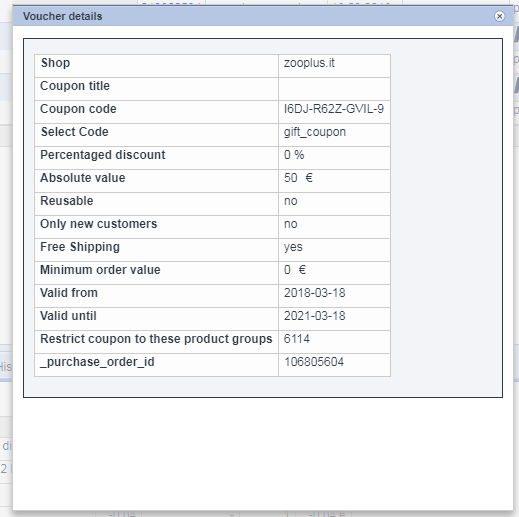

In [111]:
data[data['SCM_N_ORDER_NR'] == 105085802][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25068,448158280,105085802,2018-02-21,00:20,12,9828766,0.4614,0.0,0.0935,0.0049,0.3782,10143,2349931,70434,0,L,0,I,327,7
25069,448158278,105085802,2018-02-21,00:20,12,9828766,11.9800,0.0,4.8997,3.9985,9.8197,71948,2067174,71948,0,L,0,I,327,7
25070,448158281,105085802,2018-02-21,00:20,12,9828766,-50.0000,0.0,-40.9836,-40.9836,-40.9836,0,1,6169,0,L,0,I,0,0
25071,448158280,105085802,2018-02-21,00:20,12,9828766,36.5286,0.0,7.4061,0.3890,29.9415,70434,2349931,70434,0,L,0,I,327,7
25072,448158282,105085802,2018-02-21,00:20,12,9828766,-0.0200,0.0,-0.0164,-0.0164,-0.0164,0,6,42715,0,L,0,I,0,0
25073,448158279,105085802,2018-02-21,00:20,12,9828766,1.4900,0.0,0.5813,0.0398,1.2213,3132,1615523,3132,0,L,0,I,327,7


In [112]:
data[data['SCM_N_ORDER_NR'] == 101710902][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25116,433905988,101710902,2018-01-03,11:01,12,9828766,-50.00,0.0,-40.9836,-40.9836,-40.9836,0,1,6169,0,L,0,I,0,0
25117,433905987,101710902,2018-01-03,11:01,12,9828766,5.97,0.0,2.0134,1.2671,4.8934,75112,2213780,75112,0,L,0,I,325,7
25118,433905989,101710902,2018-01-03,11:01,12,9828766,-0.05,0.0,-0.0410,-0.0410,-0.0410,0,6,42715,0,L,0,I,0,0
25119,433905986,101710902,2018-01-03,11:01,12,9828766,44.99,0.0,14.2270,7.0693,36.8770,49529,844370,49529,0,L,0,I,325,7


In [113]:
data[data['SCM_N_ORDER_NR'] == 104244841][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25084,444614095,104244841,2018-02-08,10:26,12,9828766,25.99,0.0,8.5533,0.0719,21.3033,2502,298316,2502,0,L,0,I,325,7
25085,444614095,104244841,2018-02-08,10:26,12,9828766,25.99,0.0,8.5533,0.0719,21.3033,2502,298316,2502,0,L,0,I,325,7
25086,444614096,104244841,2018-02-08,10:26,12,9828766,-0.10,0.0,-0.0820,-0.0820,-0.0820,0,6,42715,0,L,0,I,0,0
25087,444614094,104244841,2018-02-08,10:26,12,9828766,-50.00,0.0,-40.9836,-40.9836,-40.9836,0,1,6169,0,L,0,I,0,0


In [114]:
data[data['SCM_N_ORDER_NR'] == 106844950][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25041,455560401,106844950,2018-03-18,12:26,12,9828766,-25.00,0.0,-22.7273,-22.7273,-22.7273,0,1,6169,0,L,0,I,0,0
25042,455560403,106844950,2018-03-18,12:26,12,9828766,-0.05,0.0,-0.0455,-0.0455,-0.0455,0,6,42715,0,L,0,I,0,0
25043,455560402,106844950,2018-03-18,12:26,12,9828766,25.99,0.0,5.2373,-1.6620,23.6273,69082,2379698,69082,0,L,0,I,330,2


In [115]:
data[data['SCM_N_ORDER_NR'] == 102058067][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25109,435337675,102058067,2018-01-08,11:13,12,9828766,10.99,0.0,3.2482,2.5888,9.0082,75112,2213777,75112,0,L,0,I,327,7
25110,435337676,102058067,2018-01-08,11:13,12,9828766,-0.30,0.0,-0.2459,-0.2459,-0.2459,0,6,42715,0,L,0,I,0,0
25111,435337674,102058067,2018-01-08,11:13,12,9828766,44.99,0.0,14.2270,6.8901,36.8770,49529,844370,49529,0,L,0,I,327,7
25112,435337673,102058067,2018-01-08,11:13,12,9828766,-50.00,0.0,-40.9836,-40.9836,-40.9836,0,1,6169,0,L,0,I,0,0


In [116]:
data[data['SCM_N_ORDER_NR'] == 106841206][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
25048,455544119,106841206,2018-03-18,11:40,12,9828766,19.99,0.0,3.5652,-1.2028,16.3852,23410,2111198,23410,0,L,0,I,327,7
25049,455544121,106841206,2018-03-18,11:40,12,9828766,-0.05,0.0,-0.0410,-0.0410,-0.0410,0,6,42715,0,L,0,I,0,0
25050,455544120,106841206,2018-03-18,11:40,12,9828766,10.99,0.0,2.5982,0.2142,9.0082,23410,344673,23410,0,L,0,I,327,7
25051,455544118,106841206,2018-03-18,11:40,12,9828766,-30.00,0.0,-24.5902,-24.5902,-24.5902,0,1,6169,0,L,0,I,0,0


#### Customer ID 16495905

In [117]:
data[data['CUS_N_KEY_CUSTOMER'] == 16495905].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 16495905].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0]

SCM_N_ORDER_NR
106049460   -3.5432
106097240   -0.9841
106104641   -4.7890
106186643   -1.9768
106187113   -5.2350
106220543   -1.2280
106271462   -2.6050
106330555   -0.5578
106332173   -4.1950
106333063   -0.0450
106341573   -1.4798
106361215   -2.6050
106397975   -0.7750
106493240   -3.9210
106500366   -0.6780
106507262   -2.5884
106529862   -0.7918
106575577   -2.3062
106631378   -0.3593
106645909   -1.3380
106651253   -2.6050
106723773   -4.1950
106747808   -4.1950
106763610   -1.7398
106775311   -2.6050
106775602   -4.1950
106793221   -0.3544
106819230   -4.1950
106821111   -4.4229
106821169   -0.3350
              ...  
106915169   -2.6050
107042079   -4.1950
107062189   -1.4641
107062274   -0.0710
107062833   -4.1950
107097248   -4.1950
107108010   -4.1950
107140426   -4.1950
107169979   -4.1950
107192215   -3.4449
107208448   -1.1690
107208528   -0.1330
107216466   -4.4229
107269738   -0.1606
107270778   -3.0597
107297053   -4.1950
107310291   -2.7271
107322605   -1.2980
10735

In [118]:
data[data['SCM_N_ORDER_NR'].isin(data[data['CUS_N_KEY_CUSTOMER'] == 16495905].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 16495905].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
288312,-7.528722,-7.528722,13,3,0,0,0,0,katzenfutter_trockenfutter,hills_prescription_diet
288313,26.602279,6.453670,13,3,0,0,0,0,katzenfutter_trockenfutter,hills_prescription_diet
288314,14.652975,14.652975,13,3,0,0,0,0,hundesnacks,zahnpflege_snacks
288315,17.579089,-9.449500,13,3,0,0,0,0,hundesnacks,zahnpflege_snacks
288316,-6.426610,-6.426610,13,3,0,0,0,0,hundesnacks,zahnpflege_snacks
288317,23.437728,-2.593459,13,3,0,0,0,0,hundefutter_trockenfutter,royal_canin_size
288318,-7.529233,-7.529233,13,3,0,0,0,0,hundefutter_trockenfutter,royal_canin_size
288319,21.841524,-1.774945,13,3,0,0,0,0,katzenfutter_trockenfutter,hills_prescription_diet
288320,-7.531484,-7.531484,13,3,0,0,0,0,katzenfutter_trockenfutter,hills_prescription_diet
288321,1.682698,0.644639,13,3,0,0,0,0,katzenfutter_trockenfutter,hills_prescription_diet


In [119]:
data[data['CUS_N_KEY_CUSTOMER'] == 16495905]['SCM_N_ORDER_NR'].nunique()

142

In [120]:
(data[data['CUS_N_KEY_CUSTOMER'] == 16495905]['SCM_MASTER_AP_ID'] == 6169).sum()

0

### Behaviours:
- -50€, -30€, -25€ discount coupon?? (absolute value)
- Orders with negative CM2 due to bad CM1 margin for royal_canin, hills_prescription_diet...even without using coupons

### Working on renewal logic and eligibility

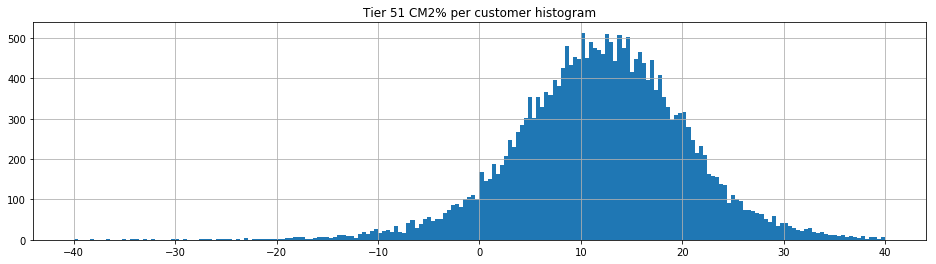

count    2.375000e+04
mean             -inf
std               NaN
min              -inf
25%      6.802676e+00
50%      1.213932e+01
75%      1.730451e+01
max      5.392014e+01
dtype: float64

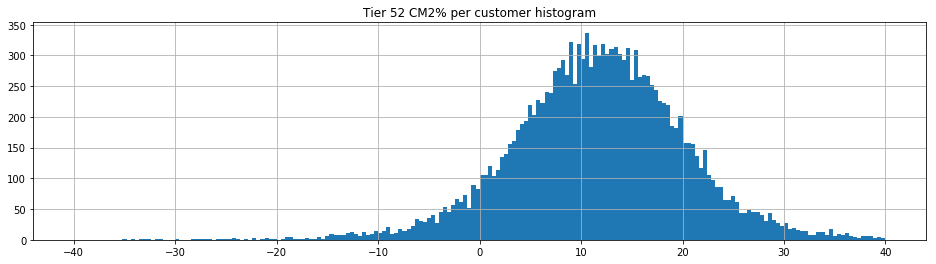

count    1.525700e+04
mean     4.928330e+03
std      6.074009e+05
min     -2.731065e+03
25%      6.479765e+00
50%      1.176477e+01
75%      1.700611e+01
max      7.502570e+07
dtype: float64

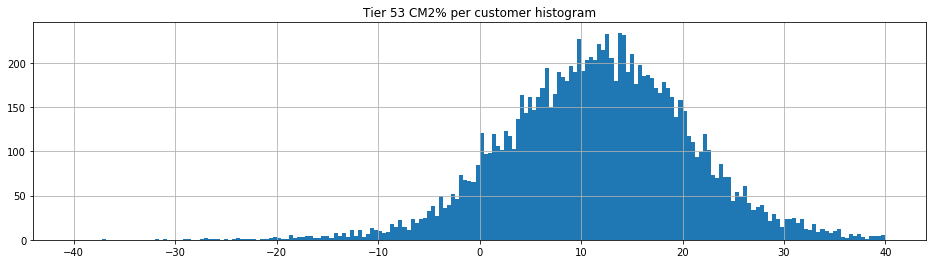

count    1.152600e+04
mean    -2.864529e+03
std      3.085987e+05
min     -3.313090e+07
25%      5.832662e+00
50%      1.191842e+01
75%      1.767607e+01
max      5.846669e+01
dtype: float64

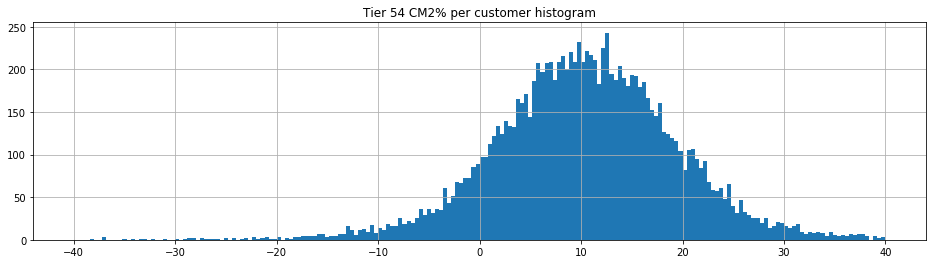

count    1.138100e+04
mean             -inf
std               NaN
min              -inf
25%      4.814261e+00
50%      1.044090e+01
75%      1.607865e+01
max      3.927770e+07
dtype: float64

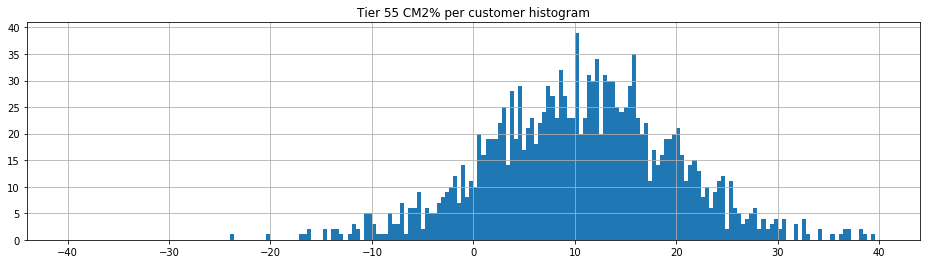

count    1569.000000
mean        9.275072
std        43.925441
min     -1665.309213
25%         4.344224
50%        10.576587
75%        16.278129
max        45.547940
dtype: float64

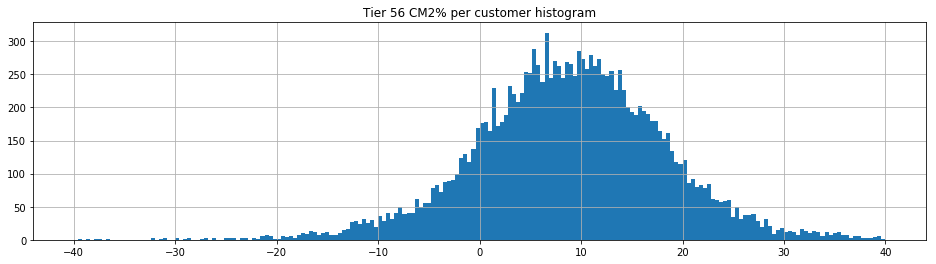

count    1.486100e+04
mean             -inf
std               NaN
min              -inf
25%      3.058865e+00
50%      8.933240e+00
75%      1.476890e+01
max      5.300997e+01
dtype: float64

In [121]:
for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    plt.figure(figsize=(16,4))
    cm2_per_cust.hist(bins=200, range=(-40, 40))
    title = 'Tier ' + str(tq) + ' CM2% per customer histogram'
    plt.title(title)
    plt.show()
    display(cm2_per_cust.describe())

In [122]:
cm2_thresholds = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cm2_thres_df = pd.DataFrame(columns=['ZTQ_ID', 'CM2%_threshold', 'eligibles'] )

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    
    for thres in cm2_thresholds:
        cm2_per_cust[cm2_per_cust > thres]
        cust_cm2 = cm2_per_cust[cm2_per_cust > thres].index.values
        row_ = [tq, thres, len(cust_cm2)]
        row_ = pd.DataFrame([row_], columns=cm2_thres_df.columns)
        cm2_thres_df = pd.concat([cm2_thres_df, row_], ignore_index=True)

Total customers in Tier  51 :  23750
Total customers in Tier  52 :  15257


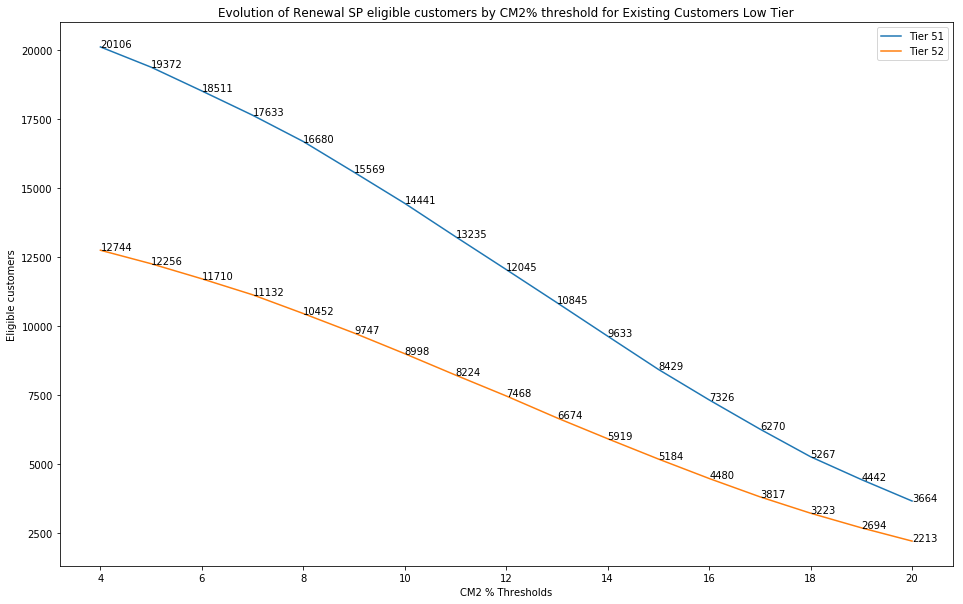

In [123]:
for tq in ztq[:2]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))
    
plt.figure(figsize=(16, 10))

for tq in ztq[:2]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers Low Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 51', 'Tier 52'])
plt.show()

Total customers in Tier  53 :  11526
Total customers in Tier  54 :  11381


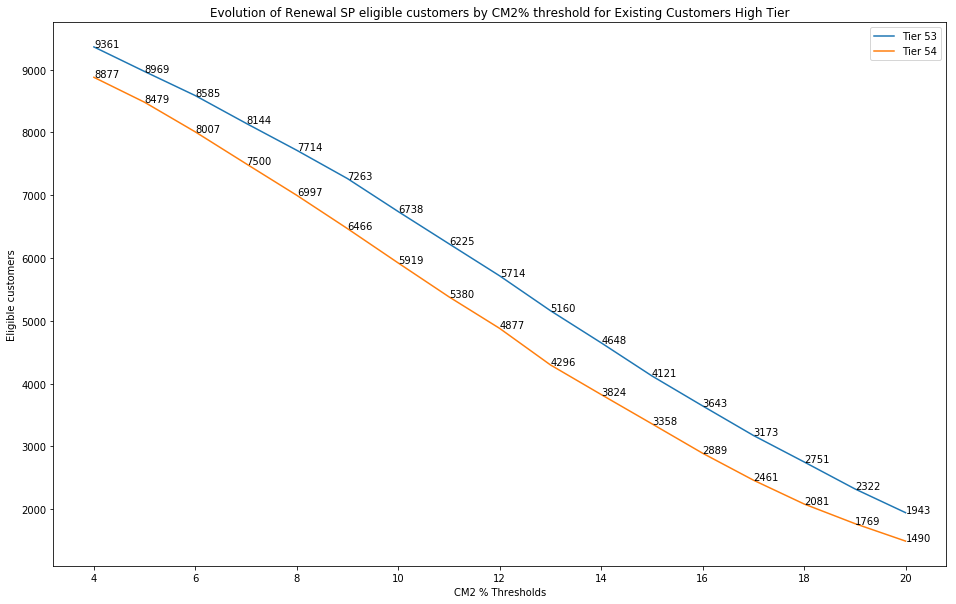

In [124]:
for tq in ztq[2:4]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[2:4]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers High Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 53', 'Tier 54'])
plt.show()

Total customers in Tier  55 :  1569
Total customers in Tier  56 :  14861


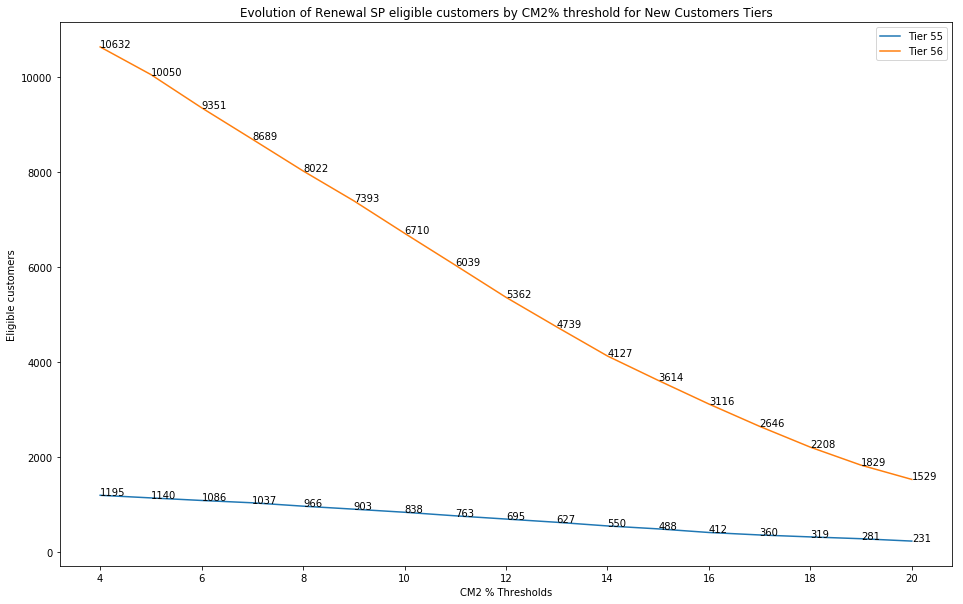

In [125]:
for tq in ztq[4:6]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[4:6]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for New Customers Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 55', 'Tier 56'])
plt.show()

In [126]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
           cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [127]:
sp_customers.round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,1649336,[54],1,35.08,28.75,35.08,12.39,12.39,43.10,0.0,0.0,5.81,5.81,20.21,0.00,0.00
1,8760437,"[54, 53]",3,331.90,272.05,110.63,74.22,24.74,27.28,0.0,0.0,35.44,11.81,13.03,33.33,-0.86
2,8917417,[54],1,87.32,71.57,87.32,21.69,21.69,30.31,0.0,0.0,10.74,10.74,15.00,0.00,0.00
3,4810643,[54],6,365.54,299.62,60.92,79.87,13.31,26.66,0.0,0.0,26.88,4.48,8.97,33.33,-1.82
4,3795353,[54],7,850.45,697.09,121.49,265.41,37.92,38.07,0.0,0.0,61.88,8.84,8.88,42.86,-11.91
5,8482234,[54],1,41.78,34.25,41.78,12.57,12.57,36.69,0.0,0.0,5.70,5.70,16.64,0.00,0.00
6,8974642,[54],1,34.45,28.24,34.45,13.70,13.70,48.51,0.0,0.0,5.82,5.82,20.61,0.00,0.00
7,8840519,[54],8,640.23,525.37,80.03,142.93,17.87,27.21,0.0,0.0,69.54,8.69,13.24,0.00,0.00
8,8832453,[54],1,53.18,43.59,53.18,12.76,12.76,29.27,0.0,0.0,5.31,5.31,12.19,0.00,0.00
9,5310544,[54],3,160.41,135.44,53.47,61.05,20.35,45.08,0.0,0.0,31.77,10.59,23.46,0.00,0.00


In [128]:
#sp_customers.round(2).to_csv('it_customers_q1.csv', sep=';', index=False, encoding='utf-8')